In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn import cluster
import geopandas
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from scipy.stats import zscore

In [2]:
SCI_df = pd.read_csv('G:\My Drive\ds_projects\FB_socialconnectedness\county_county.tsv', sep='\t')
SCI_df.head()

,user_loc,fr_loc,scaled_sci
0,1001,1001,8946863
1,1001,1003,101997
2,1001,1005,134341
3,1001,1007,254620
4,1001,1009,67196


In [3]:
SCI_df['sci_distance'] = 1/SCI_df['scaled_sci']
SCI_df.head()

,user_loc,fr_loc,scaled_sci,sci_distance
0,1001,1001,8946863,1.117710e-07
1,1001,1003,101997,9.804210e-06
2,1001,1005,134341,7.443744e-06
3,1001,1007,254620,3.927421e-06
4,1001,1009,67196,1.488184e-05


In [19]:
county_data = pd.read_pickle(r'C:\Users\mgm24\Documents\datasets\county_data.pkl')
county_data.head()

,geometry,st,state,st_abbr,county,fips,location,area_sqmi,e_totpop,m_totpop,...,RegionName,DensityCat,DensityCatName,Population2016,Density2016_SqMi,Density2016_PFbF,DensityAggreg,center_long,center_lat,KMeans_cluster
0,"POLYGON ((-86.92120 32.65755, -86.92036 32.658...",1,ALABAMA,AL,Autauga,1001,"Autauga County, Alabama",594.446120,55049,0,...,01 Deep South,3,3 Rural/Semi-Rural,55416,925.973699,1.913169,100,-86.642748,32.534928,13
1,"POLYGON ((-86.96336 33.85823, -86.95967 33.857...",1,ALABAMA,AL,Blount,1009,"Blount County, Alabama",644.806508,57704,0,...,02 Appohzarka,3,3 Rural/Semi-Rural,57704,97.358358,0.201154,100,-86.567383,33.980878,7
2,"POLYGON ((-85.59344 32.89727, -85.59334 32.984...",1,ALABAMA,AL,Chambers,1017,"Chambers County, Alabama",596.531112,34018,0,...,01 Deep South,3,3 Rural/Semi-Rural,33843,355.276725,0.734043,100,-85.392033,32.914353,9
3,"POLYGON ((-86.19637 31.42544, -86.19396 31.440...",1,ALABAMA,AL,Coffee,1031,"Coffee County, Alabama",678.985652,50991,0,...,01 Deep South,3,3 Rural/Semi-Rural,51226,541.904065,1.119636,100,-85.988159,31.402652,7
4,"POLYGON ((-88.13925 34.58780, -88.13872 34.589...",1,ALABAMA,AL,Colbert,1033,"Colbert County, Alabama",592.619664,54377,0,...,02 Appohzarka,3,3 Rural/Semi-Rural,54216,768.079047,1.586940,100,-87.804934,34.700477,7


In [5]:
# Drop all values from sci_df not in county_data
todrop = list(set(np.unique(SCI_df['user_loc'])).difference(np.unique(county_data['fips'])))
print(SCI_df.shape[0])
SCI_df = SCI_df[~SCI_df['user_loc'].isin(todrop)]
SCI_df = SCI_df[~SCI_df['fr_loc'].isin(todrop)]
print(SCI_df.shape[0])

10413529
9659664


In [40]:
sci_dist = pd.pivot(SCI_df, columns='fr_loc', values='sci_distance', index='user_loc')
sci_dist.head()

fr_loc,1001,1003,1005,1007,1009,1011,1013,1015,1017,1019,...,56027,56029,56031,56033,56035,56037,56039,56041,56043,56045
user_loc,,,,,,,,,,,,,,,,,,,,,
1001,1.117710e-07,9.804210e-06,7.443744e-06,3.927421e-06,1.488184e-05,2.330883e-06,0.000001,0.000014,0.000009,0.000028,...,0.000573,0.000597,0.000418,0.000810,0.000730,0.000561,0.000344,0.000731,0.001028,0.001453
1003,9.804210e-06,3.172975e-07,1.997443e-05,1.228879e-05,1.490024e-05,3.052969e-05,0.000006,0.000016,0.000025,0.000026,...,0.000805,0.000371,0.000298,0.000522,0.000279,0.000634,0.000158,0.000521,0.000717,0.000442
1005,7.443744e-06,1.997443e-05,2.212110e-08,3.133912e-05,5.388512e-05,1.598885e-07,0.000004,0.000018,0.000006,0.000060,...,0.000738,0.000713,0.001277,0.001645,0.001242,0.001695,0.000350,0.002358,0.001427,0.001580
1007,3.927421e-06,1.228879e-05,3.133912e-05,2.434424e-08,4.175470e-06,1.999440e-05,0.000008,0.000012,0.000028,0.000023,...,0.002273,0.000667,0.000647,0.001488,0.000774,0.001898,0.001058,0.001502,0.001391,0.001019
1009,1.488184e-05,1.490024e-05,5.388512e-05,4.175470e-06,7.533211e-08,7.212926e-05,0.000034,0.000005,0.000038,0.000006,...,0.002457,0.000709,0.000665,0.000320,0.001105,0.000487,0.000668,0.001079,0.000875,0.000513


In [41]:
county_conn = sci_dist.merge(county_data, left_on='user_loc', right_on='fips')
county_conn.head()

,1001,1003,1005,1007,1009,1011,1013,1015,1017,1019,...,RegionName,DensityCat,DensityCatName,Population2016,Density2016_SqMi,Density2016_PFbF,DensityAggreg,center_long,center_lat,KMeans_cluster
0,1.117710e-07,9.804210e-06,7.443744e-06,3.927421e-06,1.488184e-05,2.330883e-06,0.000001,0.000014,0.000009,0.000028,...,01 Deep South,3,3 Rural/Semi-Rural,55416,925.973699,1.913169,100,-86.642748,32.534928,13
1,9.804210e-06,3.172975e-07,1.997443e-05,1.228879e-05,1.490024e-05,3.052969e-05,0.000006,0.000016,0.000025,0.000026,...,03 Gulf Coast,3,3 Rural/Semi-Rural,208563,475.934591,0.983336,100,-87.722575,30.727489,13
2,7.443744e-06,1.997443e-05,2.212110e-08,3.133912e-05,5.388512e-05,1.598885e-07,0.000004,0.000018,0.000006,0.000060,...,01 Deep South,3,3 Rural/Semi-Rural,25965,139.162914,0.287527,100,-85.393213,31.869589,9
3,3.927421e-06,1.228879e-05,3.133912e-05,2.434424e-08,4.175470e-06,1.999440e-05,0.000008,0.000012,0.000028,0.000023,...,02 Appohzarka,3,3 Rural/Semi-Rural,22643,51.047742,0.105471,100,-87.126480,32.998634,11
4,1.488184e-05,1.490024e-05,5.388512e-05,4.175470e-06,7.533211e-08,7.212926e-05,0.000034,0.000005,0.000038,0.000006,...,02 Appohzarka,3,3 Rural/Semi-Rural,57704,97.358358,0.201154,100,-86.567383,33.980878,7


In [42]:
clust_model = cluster.AgglomerativeClustering(n_clusters=7, affinity='precomputed', linkage='average') #linkage='complete' another option
clust_model.fit(conn_X)

AgglomerativeClustering(affinity='precomputed', linkage='average', n_clusters=7)

<AxesSubplot:>

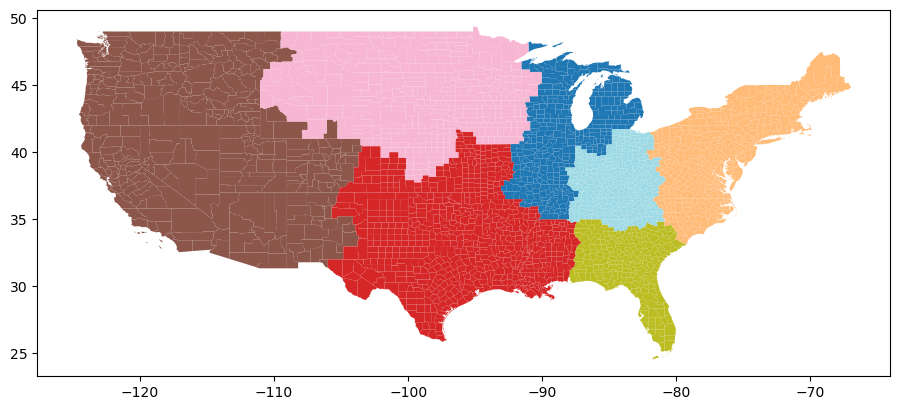

In [50]:
# county_data.shape[0]
# conn_X.shape[0]
county_conn = geopandas.GeoDataFrame(county_conn)
county_conn['Cluster'] = clust_model.labels_
county_conn.plot('Cluster', cmap='tab20', figsize=(11,10))

This recreates the figures as in [NYTimes](#https://www.nytimes.com/interactive/2018/09/19/upshot/facebook-county-friendships.html) and [Article](#https://www.aeaweb.org/articles?id=10.1257/jep.32.3.259).

Data is from https://dataforgood.facebook.com/dfg/tools/social-connectedness-index

What happens if we include geographic distances into the distance scores?

In [51]:
# Make a pairwise distance matrix

x = np.asarray(county_conn['center_long'])
y = np.asarray(county_conn['center_lat'])
coord_matrix = np.column_stack((x,y))

geo_dist = pairwise_distances(coord_matrix, metric='euclidean')

<AxesSubplot:>

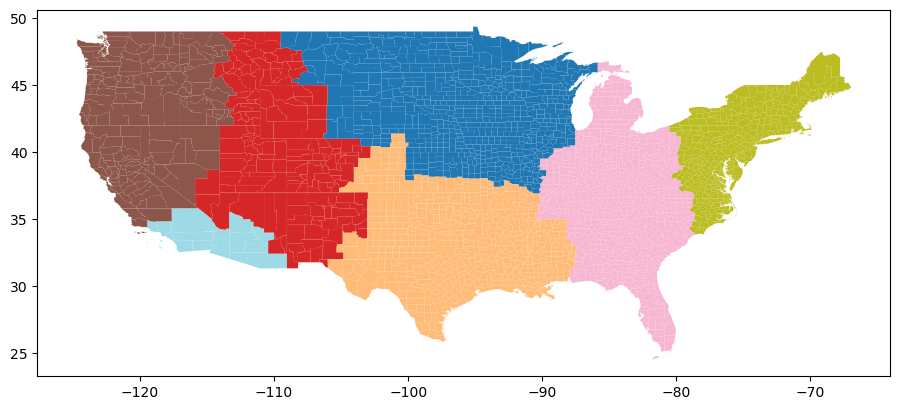

In [52]:
# Purely spatial clustering algorithm
clust_model = cluster.AgglomerativeClustering(n_clusters=7, affinity='precomputed', linkage='average') #linkage='complete' another option
clust_model.fit(geo_dist)
county_conn['Cluster'] = clust_model.labels_
county_conn.plot('Cluster', cmap='tab20', figsize=(11,10))

<AxesSubplot:>

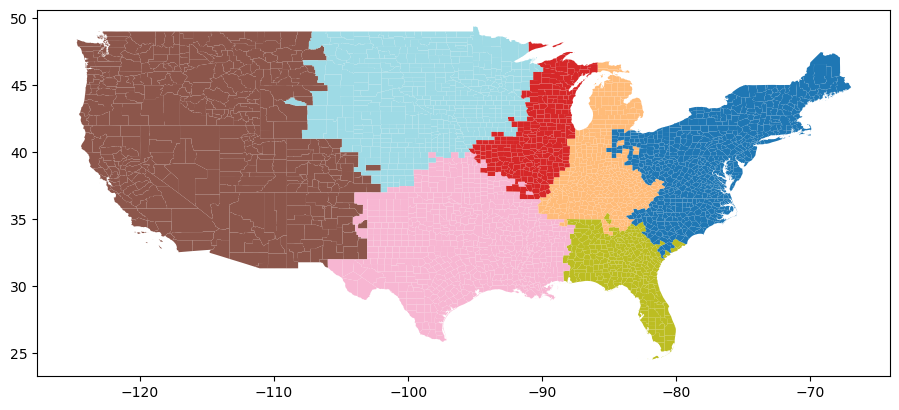

In [53]:
# Combine SCI and geographical distances

sci_dist = np.asarray(sci_dist)
sci_dist = zscore(sci_dist)
geo_dist = zscore(geo_dist)
comb_dist = sci_dist + geo_dist

clust_model.fit(comb_dist)
county_conn['Cluster'] = clust_model.labels_
county_conn.plot('Cluster', cmap='tab20', figsize=(11,10))